In [128]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('ggplot')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
# import warnings
# warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split



In [94]:
data = pd.read_csv ("C:\\Users\\nilli\\Downloads\\house-prices-advanced-regression-techniques\\train.csv")

print(data.head(2))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  

[2 rows x 81 columns]


In [95]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

# Numerical Variables


drop id

In [96]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [97]:
df= data.copy()

In [98]:
df =df.drop(['Id'], axis=1)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [99]:
#check missing values
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [100]:
#missing value counts in each of these columns
miss = df.isnull().sum()/len(df)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

In [101]:
dfnum =df.select_dtypes(include =['float', 'int64'])
dfnum 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


excluding MSSubclass from the numerical variables

In [102]:
#check numerical missing values
dfnum.columns[dfnum.isnull().any()]

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [103]:
# dfnum[dfnum["GarageYrBlt"].isnull().any(axis =1)]
gb = pd.isnull(df["GarageYrBlt"])
df[gb][["GarageYrBlt",'GarageCond']]   #  

,GarageYrBlt,GarageCond
39,NaN,NaN
48,NaN,NaN
78,NaN,NaN
88,NaN,NaN
89,NaN,NaN
...,...,...
1349,NaN,NaN
1407,NaN,NaN
1449,NaN,NaN
1450,NaN,NaN


In [104]:
lf = pd.isnull(df["LotFrontage"])
df[lf]["LotFrontage"]

7      NaN
12     NaN
14     NaN
16     NaN
24     NaN
        ..
1429   NaN
1431   NaN
1441   NaN
1443   NaN
1446   NaN
Name: LotFrontage, Length: 259, dtype: float64

In [105]:
mva = pd.isnull(df["MasVnrArea"])
df[mva][["MasVnrArea","MasVnrType"]]

,MasVnrArea,MasVnrType
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


Dealing with missingness

In [106]:
stats.mode(df['Electrical']).mode


array(['SBrkr'], dtype=object)

In [107]:
df['LotFrontage'].median()

69.0

In [108]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [110]:
df["GarageYrBlt"].fillna(0, inplace=True)# house with no garage
df["LotFrontage"].fillna(69.0, inplace=True)# filled with median
df["MasVnrArea"].fillna(0, inplace=True) # house with no Masonry veneer
df["GarageCond"].fillna("No Garage", inplace=True)
df["GarageQual"].fillna("No Garage", inplace=True)
df["GarageFinish"].fillna("No Garage", inplace=True)
df["GarageType"].fillna("No Garage", inplace=True)

df["Alley"].fillna("No alley access", inplace=True)
df["MasVnrType"].fillna("None", inplace=True)
df["BsmtQual"].fillna("No Basement", inplace=True)
df["BsmtCond"].fillna("No Basement", inplace=True)
df["BsmtExposure"].fillna("No Basement", inplace=True)
df["BsmtFinType1"].fillna("No Basement", inplace=True)
df["BsmtFinType2"].fillna("No Basement", inplace=True)
df["Electrical"].fillna("SBrkr", inplace=True) ### mode
df["FireplaceQu"].fillna("No Fireplace", inplace=True)
df["PoolQC"].fillna("No Pool", inplace=True)
df["Fence"].fillna("No Fence", inplace=True)
df["MiscFeature"].fillna("None", inplace=True)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,MnPrv,None,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,4,2010,WD,Normal,142125


In [111]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [112]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [113]:
#descriptive statistics summary
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

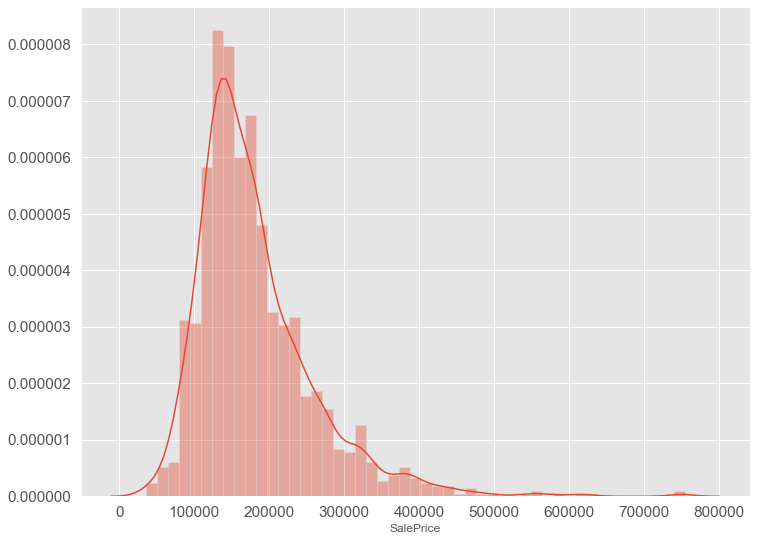

In [114]:
#histogram
f, ax = plt.subplots(figsize=(12, 9))
sns.distplot(df['SalePrice']);

median house price sale is 163000
distribution skewed right.

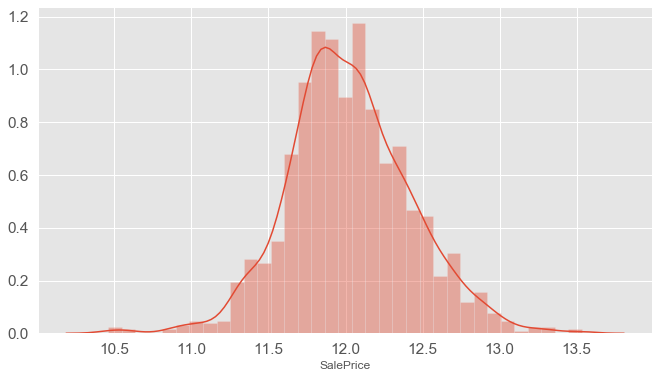

In [115]:
f, ax = plt.subplots(figsize=(11, 6))
sns.distplot(np.log(df['SalePrice']))

Sale price was log transformed so that expensive and cheap houses would affect the model in a similar fashion

In [116]:
# df.hist(bins=50, figsize=(20,15))

In [117]:
#dfnum.iloc['LotFrontage']: dfnum['SalePrice']]
dfnum1 =dfnum.iloc[:,1:]
dfnum1

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,85.0,13175,6,6,1978,1988,119.0,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,66.0,9042,7,9,1941,2006,0.0,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,68.0,9717,5,6,1950,1996,0.0,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


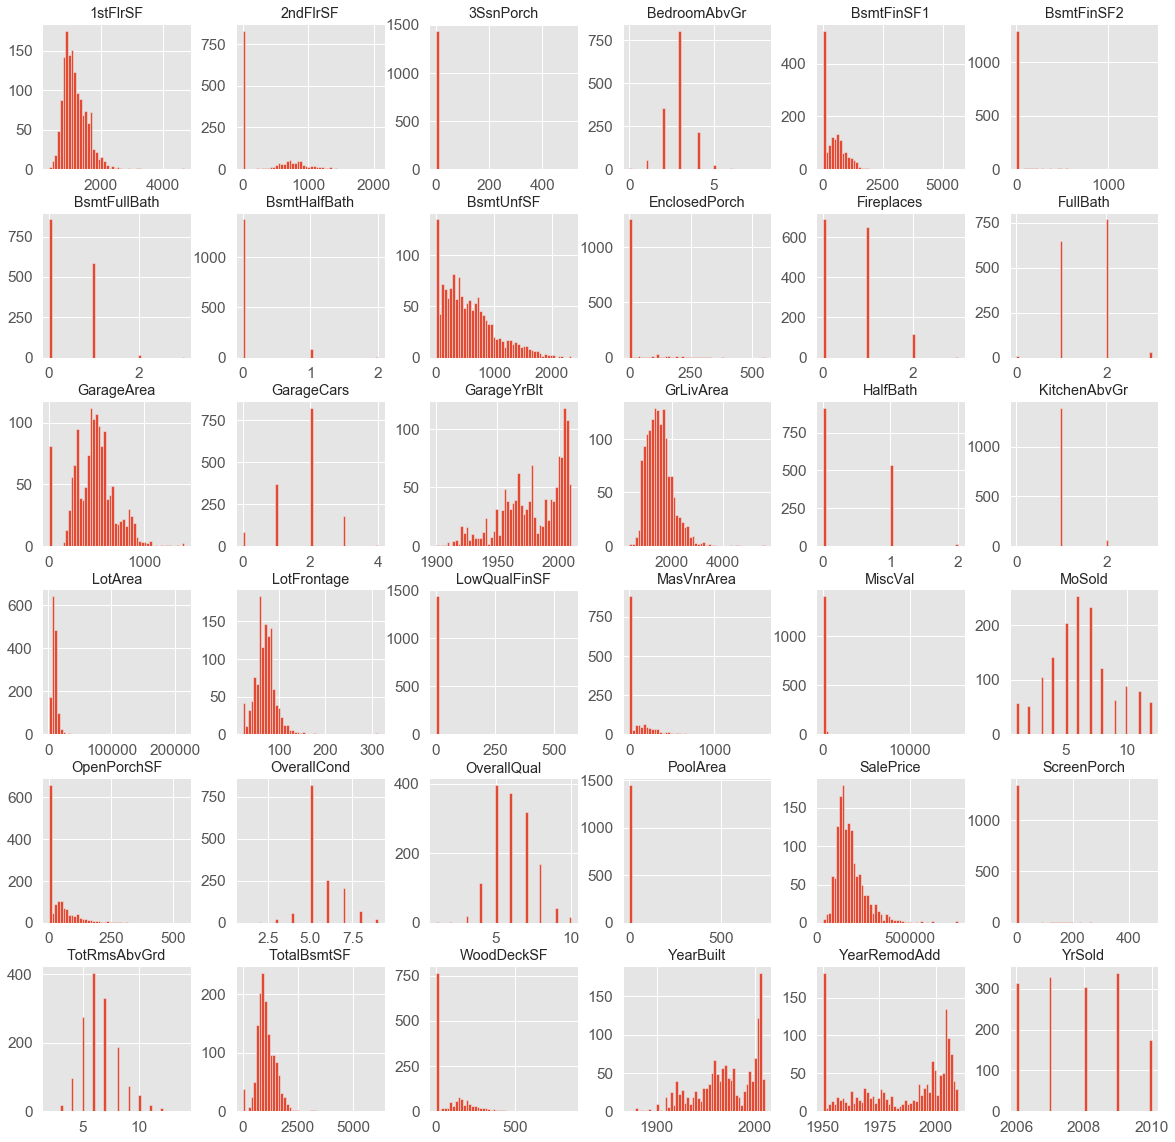

In [118]:
dfnum1.hist(bins=50, figsize=(20,20))
plt.savefig('histnum.png')

right skewed features: TotalBsmtSF, WoodDeckSF,openPorchSF,MasVnrArea,GarageYrBlt, lot Area,BsmtFinSF1
    

# Bivariate analysis



In [119]:
dfnum1.corr()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479


In [120]:
corr = dfnum1.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


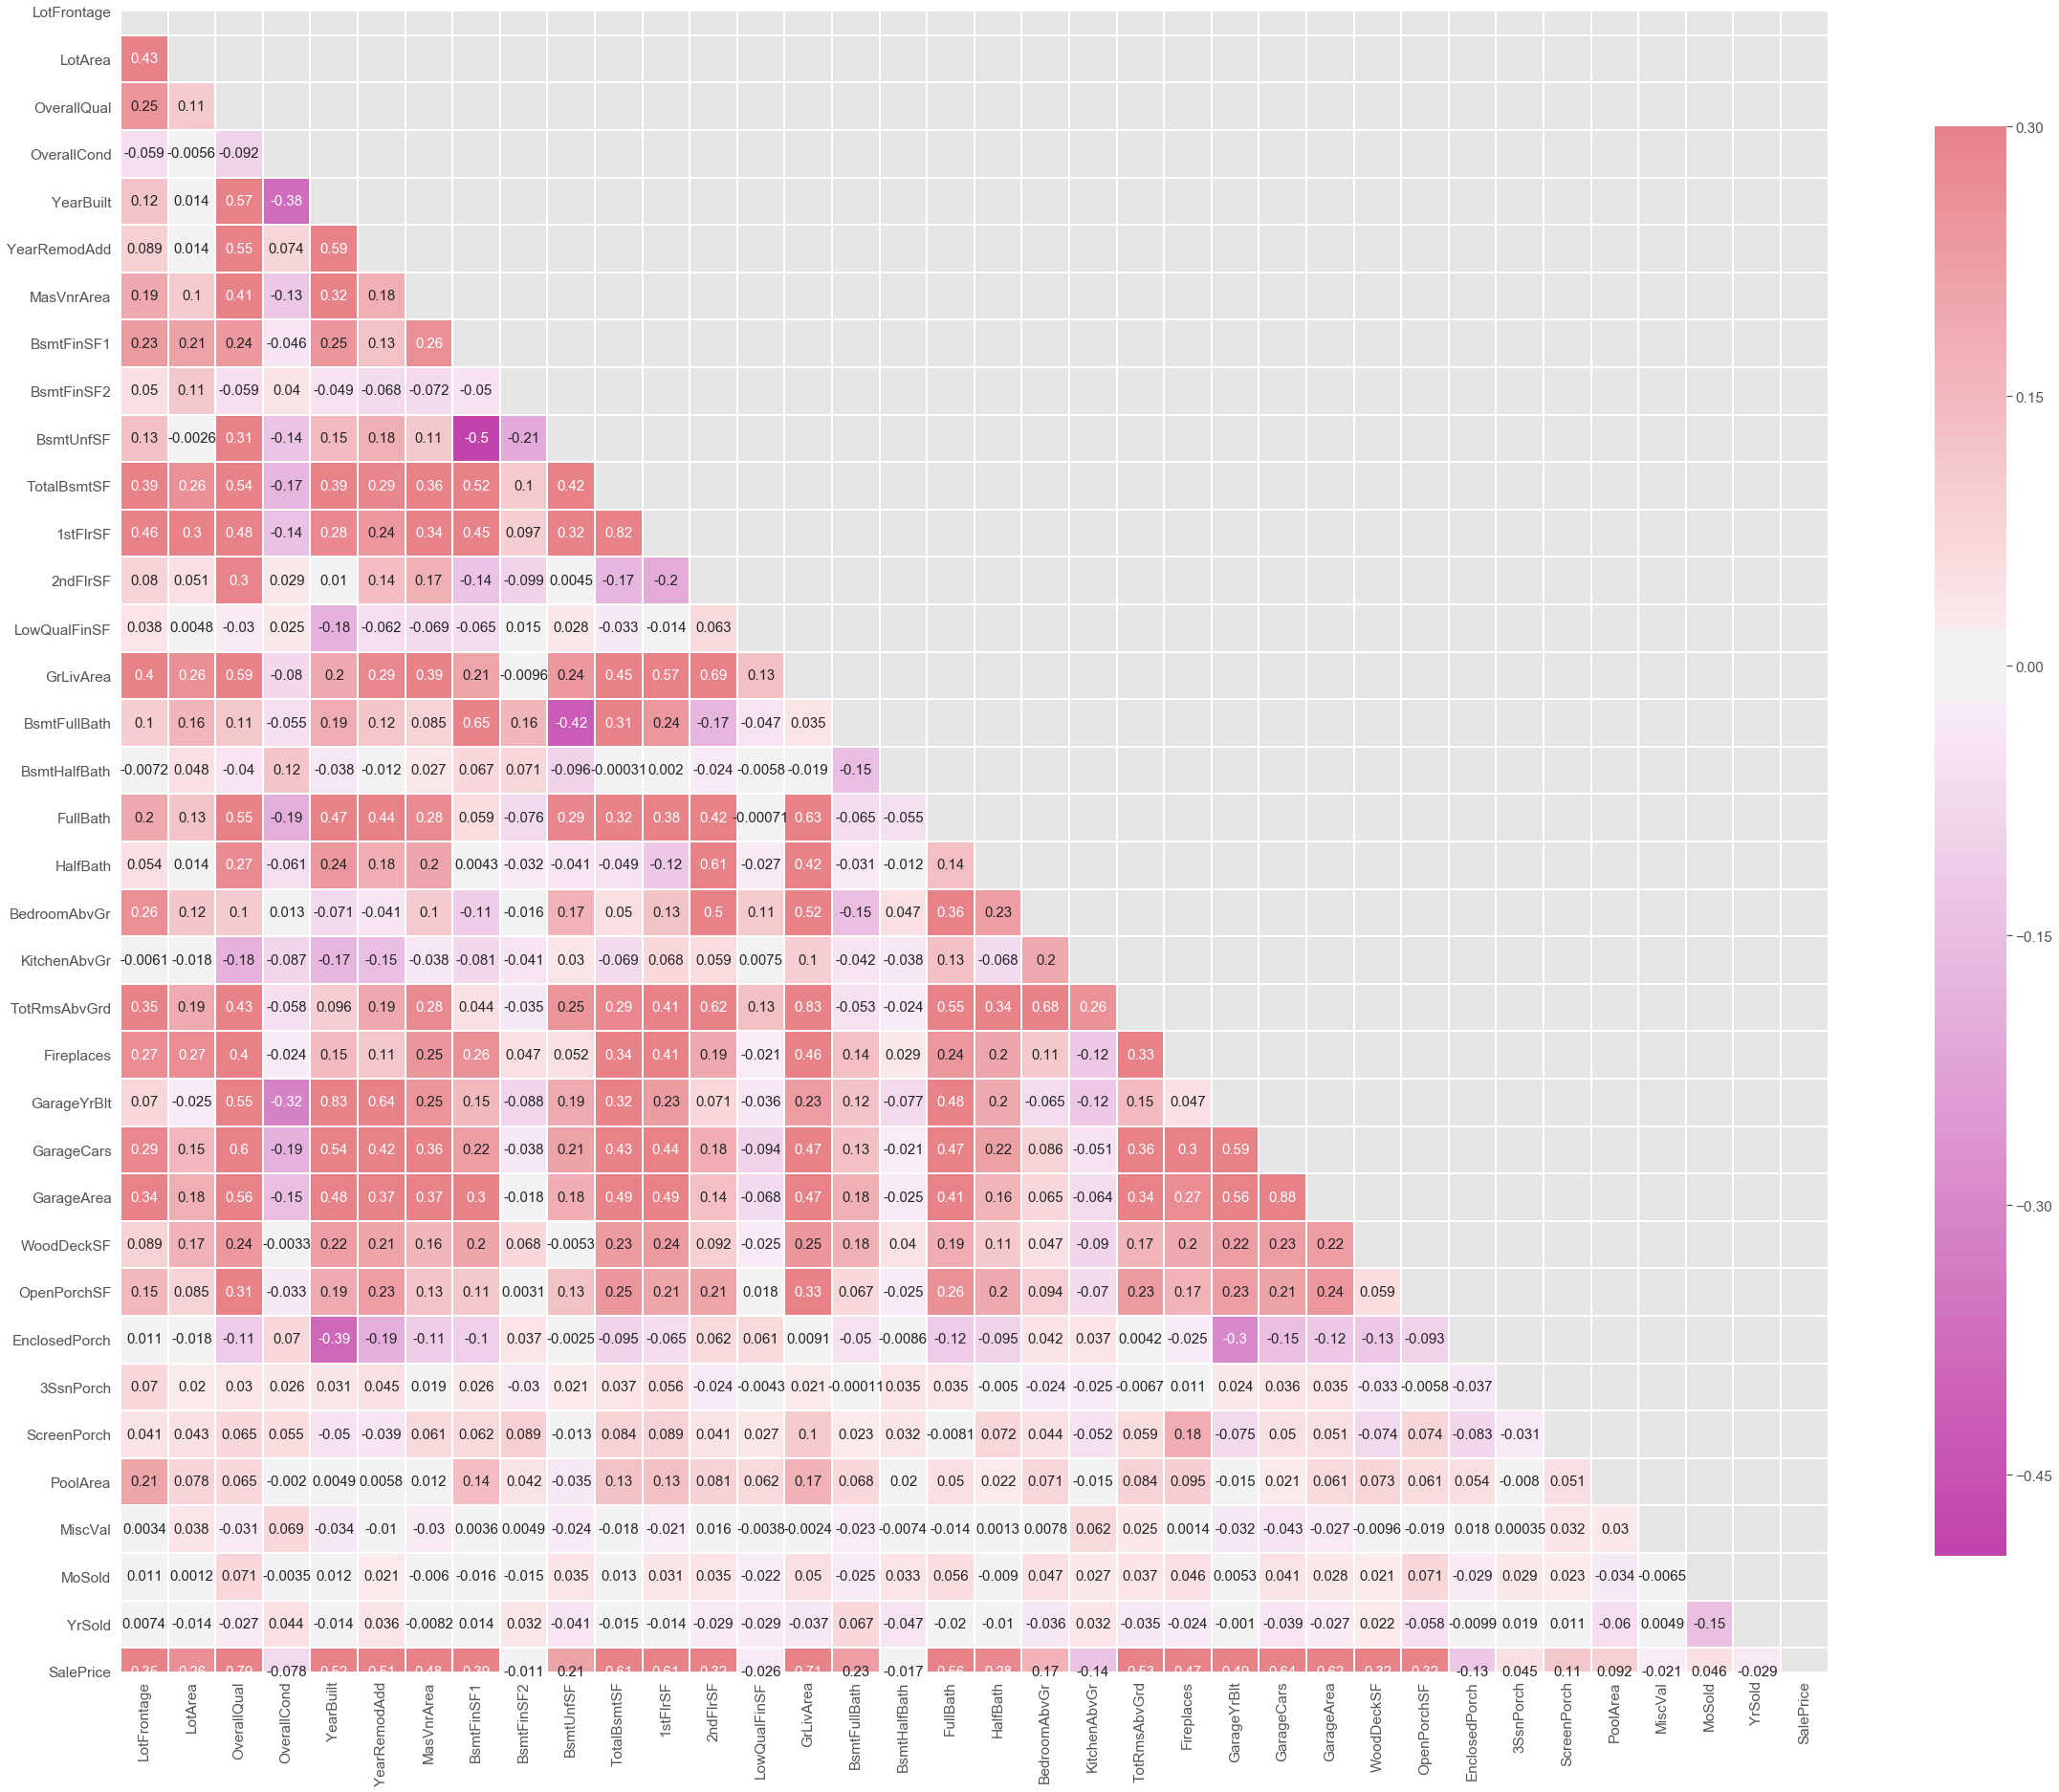

In [121]:
# Generate a mask for the upper triangle  # using np.tril will mask the lower triangle
mask = np.triu(np.ones_like(dfnum1.corr(), dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 55))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(320, 10, as_cmap=True)

# Create the heatmap  # annot =True shows the correlation values
sns.heatmap(dfnum1.corr(), vmax=.3, center=0,
            square=True, linewidths=1, mask=mask, cmap=cmap, annot=True,annot_kws={'size': 15},cbar_kws={"shrink": .5})
sns.set(font_scale=1.4)

In [122]:
# columns = np.full((dfnum1.corr().shape[0],), True, dtype=bool)
# for i in range(dfnum1.corr().shape[0]):
#     for j in range(i+1, dfnum1.corr().shape[0]):
#         if dfnum1.corr().iloc[i,j] >= 0.5:
#             if columns[j]:
#                 columns[j] = False
# selected_columns = dfnum1.columns[columns]
# df4 = dfnum1[selected_columns]
# df4

In [123]:
# df4.columns

In [124]:
dfn3 =df.select_dtypes(include =["object"])


C:\Users\nilli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


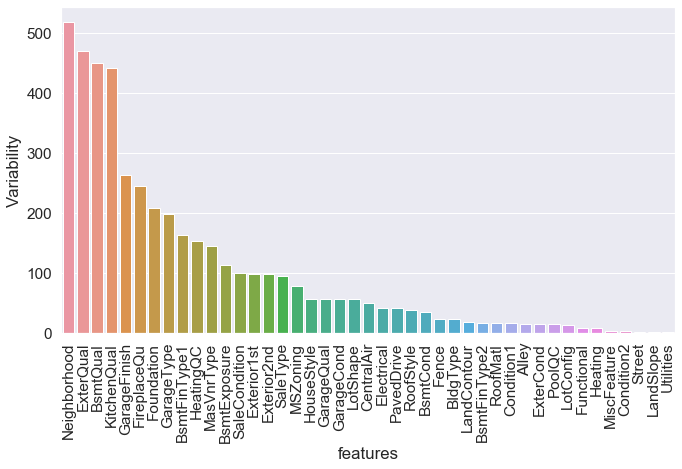

In [126]:
cat = [f for f in df.columns if df.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for elm in frame[c].unique():
                  s = frame[frame[c] == elm]['SalePrice'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

dfn3['SalePrice'] = df['SalePrice'].values
k = anova(dfn3) 
k['Variability'] = np.log(1./k['pval'].values) 
f, ax = plt.subplots(figsize=(11, 6))
sns.barplot(data=k, x = 'features', y='Variability') 
plt.xticks(rotation=90) 
plt .savefig('FeatureSelectionAnova.png')

In [34]:
k

,features,pval,Variability
8,Neighborhood,1.558600e-225,517.637858
18,ExterQual,1.439551e-204,469.363028
21,BsmtQual,8.158548e-196,449.207612
30,KitchenQual,3.032213e-192,440.987045
34,GarageFinish,6.228747e-115,262.968110
32,FireplaceQu,2.971217e-107,245.287633
20,Foundation,5.791895e-91,207.778784
33,GarageType,6.117026e-87,198.513827
24,BsmtFinType1,2.386358e-71,162.613773
27,HeatingQC,2.667062e-67,153.292224


In [35]:

# from sklearn.ensemble import ExtraTreesClassifier
# array = df.values
# Xl = array[:,0:79]
# Yl = array[:, 79]
# model = ExtraTreesClassifier(n_estimators=10)
# model.fit(Xl, Yl)
# print(model.feature_importances_)

#### Dealing with outliers


In [36]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [37]:
df[["SalePrice","GrLivArea"]].sort_values( by= ["GrLivArea","SalePrice"] , ascending =[False,True])

,SalePrice,GrLivArea
1298,160000,5642
523,184750,4676
1182,745000,4476
691,755000,4316
1169,625000,3627
...,...,...
528,86000,605
29,68500,520
916,35311,480
1100,60000,438


In [38]:
df.loc[[1298,523]]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,60,RL,313.0,63887,Pave,No alley access,IR3,Bnk,AllPub,Corner,...,480,Gd,No Fence,None,0,1,2008,New,Partial,160000
523,60,RL,130.0,40094,Pave,No alley access,IR1,Bnk,AllPub,Inside,...,0,No Pool,No Fence,None,0,10,2007,New,Partial,184750


In [39]:
df =df.drop([1298,523], axis= 0)

In [40]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,MnPrv,None,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,4,2010,WD,Normal,142125


In [41]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,MnPrv,None,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,4,2010,WD,Normal,142125


In [42]:
# import statsmodels.api as sm
# x = sm.add_constant(dfn3)
# # # Notice that the dependent variable (y) comes before the independent variables (x)
# # # Use df.columns.values to get all the column names
# model = sm.OLS(np.log(df['SalePrice']), x)
# results = model.fit()
# print(results.summary())

In [43]:
# House completed before sale or not
df["CompletionHouse"] = df.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})
#df["CompletionHouse"] = df.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
 #                                                     "Family" : 0, "Normal" : 0, "Partial" : 1})#

In [44]:
df['SaleType'].value_counts()

WD       1267
New       120
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [45]:
df["SaleConventional"] = df.SaleType.replace({'WD':1,'New':0,'COD':0,'ConLD':0,'ConLI':0,'CWD':0,'Oth':0,'Con':0,'ConLw':0 })

In [46]:
#df[""]WoodDeckSF
df["SaleConventional"].value_counts()

1    1267
0     191
Name: SaleConventional, dtype: int64

In [47]:
df["CompletionHouse"].value_counts()

0    1335
1     123
Name: CompletionHouse, dtype: int64

In [48]:
df["AllPorchSF"] = df["OpenPorchSF"] + df["EnclosedPorch"] + df["3SsnPorch"] + df["ScreenPorch"]


In [49]:
df['Fireplaces'].value_counts()

0    690
1    649
2    115
3      4
Name: Fireplaces, dtype: int64

In [50]:
df["HaveFireplace"]= df.Fireplaces.replace({ 0:"N", 1:"Y",2:"Y",3:"Y"})


In [ ]:
# def encode(x):
#     return 1 if x == 0 else 1
# df['HaveFireplace'] = train.Fireplaces.apply(encode)
# test['enc_condition'] = test.Fireplaces.apply(encode)

In [51]:
df["HaveFireplace"].value_counts()

Y    768
N    690
Name: HaveFireplace, dtype: int64

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [52]:
df["HouseQual"]= df.OverallQual.replace({ 10:"G", 9:"G",8:"G",7:"G", 6:"A", 5:"A",4:"B",3:"B",2:"B", 1:"B"})

In [53]:
df["HouseQual"].value_counts()

A    771
G    546
B    141
Name: HouseQual, dtype: int64

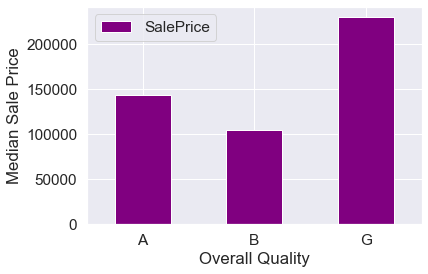

In [54]:
hqpivot = df.pivot_table(index="HouseQual",
                  values='SalePrice', aggfunc=np.median)
                  
                  
hqpivot.plot(kind='bar', color='purple')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [55]:
df['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     16
2       3
1       2
Name: OverallQual, dtype: int64

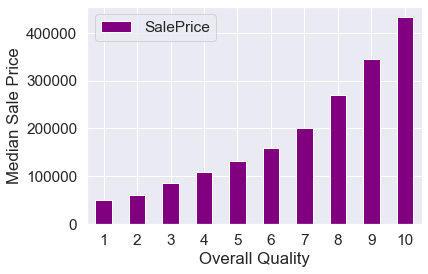

In [127]:
qpivot = df.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)
                  
                  
qpivot.plot(kind='bar', color='purple')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.savefig('pricebyQual.png')

In [57]:
df['LotShape'].value_counts()

Reg    925
IR1    483
IR2     41
IR3      9
Name: LotShape, dtype: int64

In [58]:
df[["OpenPorchSF", "EnclosedPorch","3SsnPorch","ScreenPorch","WoodDeckSF"]]

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,WoodDeckSF
0,61,0,0,0,0
1,0,0,0,0,298
2,42,0,0,0,0
3,35,272,0,0,0
4,84,0,0,0,192
...,...,...,...,...,...
1455,40,0,0,0,0
1456,0,0,0,0,349
1457,60,0,0,0,0
1458,0,112,0,0,366


In [59]:
df['Total_size']= df['BsmtFinSF1']+ df['BsmtFinSF2'] + df['1stFlrSF'] +df['2ndFlrSF']+df['GarageArea']

In [60]:
def helper(x):
    if x.BldgType == "TwnhsE":
        return 'Twnhs'
    else:
        return x.BldgType

df['BldgType_clean']=df.apply(helper,axis=1)

In [61]:
df['Outdoor_Porch_Size']= df['WoodDeckSF']+df['OpenPorchSF']

In [62]:
# def recent_constr(x):
#     if(x.YearBuilt < x.YearRemodAdd):
#         return x.YearRemodAdd
#     else: 
#         return x.YearBuilt

# #defining intermediate column    
# df['time_remod'] = data.apply(recent_constr,axis=1)

#helper 2
def recent_constr(x):
    if(x.YearBuilt < x.YearRemodAdd):
        return x.YearRemodAdd
    else: 
        return x.YearBuilt

#defining intermediate column 2    
df['Recent_yr'] = df.apply(recent_constr,axis=1)

#time to sale helper defined:
def time_to_sale(x):
    return x.YrSold - x.Recent_yr

#new column defined to be used in Train
df['Age_at_sale']=df.apply(time_to_sale,axis=1)

In [63]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,CompletionHouse,SaleConventional,AllPorchSF,HaveFireplace,HouseQual,Total_size,BldgType_clean,Outdoor_Porch_Size,Recent_yr,Age_at_sale
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,1,61,N,G,2964,1Fam,61,2003,5
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,0,1,0,Y,A,2700,1Fam,298,1976,31
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,1,42,Y,G,2880,1Fam,42,2002,6
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,1,307,Y,G,2575,1Fam,35,1970,36
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,1,84,Y,G,3689,1Fam,276,2000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,1,40,Y,A,2107,1Fam,40,2000,7
1456,20,RL,85.0,13175,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,1,0,Y,A,3526,1Fam,349,1988,22
1457,70,RL,66.0,9042,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,1,60,Y,G,2867,1Fam,60,2006,4
1458,20,RL,68.0,9717,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,1,112,N,A,2396,1Fam,366,1996,14


### Preprocessing


In [64]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

 1## trainFeatures= df[['HouseQual', 'BldgType_clean', 'Outdoor_Porch_Size', 'Recent_yr',
        'Age_at_sale','SaleConventional', 'CompletionHouse','Total_size', 'AllPorchSF','HaveFireplace','YrSold','Neighborhood','ExterQual','KitchenQual']], score = 0.859, RMSE= 0.192, R2pretty bad 0.78
        
        
   2## trainFeatures= df[['HouseQual', 'BldgType_clean', 'Outdoor_Porch_Size', 'Recent_yr',
        'Age_at_sale','SaleConventional','LotArea', 'CompletionHouse','Total_size', 'AllPorchSF','HaveFireplace','YrSold','Neighborhood','ExterQual','KitchenQual']], score = 0.859, RMSE= 0.192, R2pretty bad 0.78
        
             
   #3 trainFeatures = df[['Neighborhood','OverallQual','YearBuilt', 'YearRemodAdd','LotArea' ,'RoofStyle','Exterior1st', 'Exterior2nd','ExterQual','Foundation','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','HeatingQC', 'GrLivArea', 'KitchenQual','Fireplaces','GarageArea']]
     
   score = 0.87, RMSE= 0.14, R2pretty bad 0.85
             
        
        
        
        

In [65]:
# trainFeatures = df[['HouseQual', 'BldgType_clean', 'Recent_yr', 'Age_at_sale',
#    'Total_size','AllPorchSF','HaveFireplace','YrSold','Neighborhood','ExterQual','KitchenQual']]

trainFeatures = df[["Neighborhood", "OverallQual", "Total_size", "KitchenQual", "Age_at_sale", "ExterQual", "YrSold",
  "LotArea", "BldgType_clean", 'Outdoor_Porch_Size', "Fireplaces"]]
# #trainFeatures = df[['Neighborhood','OverallQual','YearBuilt', 
#                'YearRemodAdd','LotArea' ,'RoofStyle',
#                'Exterior1st', 'Exterior2nd','ExterQual',
#                'Foundation','BsmtFinSF1','BsmtFinSF2',
#                'BsmtUnfSF','TotalBsmtSF','HeatingQC', 
#                'GrLivArea', 'KitchenQual','Fireplaces',
#                'GarageArea']]
# trainFeatures = df[['Neighborhood','OverallQual','YearBuilt', 
#                'YearRemodAdd','LotArea' ,'ExterQual','BsmtFinSF1','BsmtFinSF2',
#                'BsmtUnfSF','TotalBsmtSF','HeatingQC', 
#                'GrLivArea', 'KitchenQual','Fireplaces',
#                'GarageArea']]

# trainFeatures= df[[ 'BldgType_clean', 'Recent_yr',
#        'Age_at_sale','SaleConventional', 'CompletionHouse','Exterior1st',
# 'TotalBsmtSF','OverallQual','GarageArea' ,'AllPorchSF','HaveFireplace',
# 'YrSold','Neighborhood','ExterQual','KitchenQual']]


In [66]:
log_sales = np.log(df['SalePrice'])

In [67]:
X =trainFeatures
Y= log_sales

In [68]:
Y = pd.Series( log_sales)
Y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1458, dtype: float64

In [69]:
# df['Neighborhood']

In [70]:
trainFeatures

,Neighborhood,OverallQual,Total_size,KitchenQual,Age_at_sale,ExterQual,YrSold,LotArea,BldgType_clean,Outdoor_Porch_Size,Fireplaces
0,CollgCr,7,2964,Gd,5,Gd,2008,8450,1Fam,61,0
1,Veenker,6,2700,TA,31,TA,2007,9600,1Fam,298,1
2,CollgCr,7,2880,Gd,6,Gd,2008,11250,1Fam,42,1
3,Crawfor,7,2575,Gd,36,TA,2006,9550,1Fam,35,1
4,NoRidge,8,3689,Gd,8,Gd,2008,14260,1Fam,276,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,Gilbert,6,2107,TA,7,TA,2007,7917,1Fam,40,1
1456,NWAmes,6,3526,TA,22,TA,2010,13175,1Fam,349,2
1457,Crawfor,7,2867,Gd,4,Ex,2010,9042,1Fam,60,2
1458,NAmes,5,2396,Gd,14,TA,2010,9717,1Fam,366,0


In [71]:
from sklearn.preprocessing import OneHotEncoder
Neighborhood_ohe = OneHotEncoder( drop='first', sparse = False )
Neighborhood_enc = Neighborhood_ohe.fit_transform( X[['Neighborhood']] )
Neighborhood_enc = pd.DataFrame( Neighborhood_enc, columns=Neighborhood_ohe.get_feature_names(['Neighborhood']) )
X = pd.concat( (X.drop(['Neighborhood'], axis=1).reset_index(drop = True), Neighborhood_enc), axis = 1 )
X.head()



# # dummify RoofStyle column
# RoofStyle_ohe = OneHotEncoder( drop='first', sparse = False )
# RoofStyle_enc = RoofStyle_ohe.fit_transform( X[['RoofStyle']] )
# RoofStyle_enc = pd.DataFrame( RoofStyle_enc, columns=RoofStyle_ohe.get_feature_names(['RoofStyle']) )
# X = pd.concat( (X.drop(["RoofStyle"], axis=1).reset_index(drop = True), RoofStyle_enc), axis = 1 )
# X.head()

# #dummify Exterior1st Column
# Exterior1st_ohe = OneHotEncoder( drop='first', sparse = False )
# Exterior1st_enc = Exterior1st_ohe.fit_transform(X[['Exterior1st']] )
# Exterior1st_enc = pd.DataFrame( Exterior1st_enc, columns=Exterior1st_ohe.get_feature_names(['Exterior1st']) )
# X = pd.concat( (X.drop(["Exterior1st"], axis=1).reset_index(drop = True), Exterior1st_enc), axis = 1 )
# X.head()

# #dummify Exterior2nd Column
# Exterior2nd_ohe = OneHotEncoder( drop='first', sparse = False )
# Exterior2nd_enc = Exterior2nd_ohe.fit_transform( X[['Exterior2nd']] )
# Exterior2nd_enc = pd.DataFrame( Exterior2nd_enc, columns=Exterior2nd_ohe.get_feature_names(['Exterior2nd']) )
# X = pd.concat( (X.drop(["Exterior2nd"], axis=1).reset_index(drop = True), Exterior2nd_enc), axis = 1 )
# X.head()

# #dummify Foundation Column
# Foundation_ohe = OneHotEncoder( drop='first', sparse = False )
# Foundation_enc = Foundation_ohe.fit_transform( X[['Foundation']] )
# Foundation_enc = pd.DataFrame( Foundation_enc, columns=Foundation_ohe.get_feature_names(['Foundation']) )
# X = pd.concat( (X.drop(["Foundation"], axis=1).reset_index(drop = True), Foundation_enc), axis = 1 )
# X.head()

# #dummify Heating QC Column
# HeatingQC_ohe = OneHotEncoder( drop='first', sparse = False )
# HeatingQC_enc = HeatingQC_ohe.fit_transform( X[['HeatingQC']] )
# HeatingQC_enc = pd.DataFrame( HeatingQC_enc, columns=HeatingQC_ohe.get_feature_names(['HeatingQC']) )
# X = pd.concat( (X.drop(["HeatingQC"], axis=1).reset_index(drop = True), HeatingQC_enc), axis = 1 )
# X.head()

# dummify KitchenQual column
from sklearn.preprocessing import OneHotEncoder
KitchenQual_ohe = OneHotEncoder( drop='first', sparse = False )
KitchenQual_enc = KitchenQual_ohe.fit_transform( X[['KitchenQual']] )
KitchenQual_enc = pd.DataFrame( KitchenQual_enc, columns=KitchenQual_ohe.get_feature_names(['KitchenQual']) )
X = pd.concat( (X.drop(["KitchenQual"], axis=1).reset_index(drop = True), KitchenQual_enc), axis = 1 )
X.head()

# dummify Fireplaces column
Fireplaces_ohe = OneHotEncoder( drop='first', sparse = False, categories="auto" )
Fireplaces_enc = Fireplaces_ohe.fit_transform(X[['Fireplaces']] )
Fireplaces_enc = pd.DataFrame( Fireplaces_enc, columns=Fireplaces_ohe.get_feature_names(['Fireplaces']) )
X = pd.concat( (X.drop(["Fireplaces"], axis=1).reset_index(drop = True), Fireplaces_enc), axis = 1 )
X.head()

# dummify OverallQual column
# OverallQual_ohe = OneHotEncoder( drop='first', sparse = False,categories="auto"  )
# OverallQual_enc = OverallQual_ohe.fit_transform(X[['OverallQual']] )
# OverallQual_enc = pd.DataFrame( OverallQual_enc, columns=OverallQual_ohe.get_feature_names(['OverallQual']) )
# X = pd.concat( (X.drop(["OverallQual"], axis=1).reset_index(drop = True), ExterQual_enc), axis = 1 )
# X.head()

# dummify ExterQual column
ExterQual_ohe = OneHotEncoder( drop='first', sparse = False )
ExterQual_enc = ExterQual_ohe.fit_transform(X[['ExterQual']] )
ExterQual_enc = pd.DataFrame( ExterQual_enc, columns=ExterQual_ohe.get_feature_names(['ExterQual']) )
X = pd.concat( (X.drop(["ExterQual"], axis=1).reset_index(drop = True), ExterQual_enc), axis = 1 )
X.head()

#dummify Building Type
BldgType_clean_ohe = OneHotEncoder( drop='first', sparse = False )
BldgType_clean_enc = BldgType_clean_ohe.fit_transform( X[['BldgType_clean']] )
BldgType_clean_enc = pd.DataFrame( BldgType_clean_enc, columns=BldgType_clean_ohe.get_feature_names(['BldgType_clean']) )
X = pd.concat( (X.drop(["BldgType_clean"], axis=1).reset_index(drop = True), BldgType_clean_enc), axis = 1 )
X.head()

#dummify YrSold
YrSold_ohe = OneHotEncoder( drop='first', sparse = False, categories="auto" )
YrSold_enc = YrSold_ohe.fit_transform( X[['YrSold']] )
YrSold_enc = pd.DataFrame( YrSold_enc, columns=YrSold_ohe.get_feature_names(['YrSold']) )
X = pd.concat( (X.drop(["YrSold"], axis=1).reset_index(drop = True), YrSold_enc), axis = 1 )
X.head()

# #dummify df["CompletionHouse"]
# CompletionHouse_ohe = OneHotEncoder( drop='first', sparse = False,categories="auto"  )
# CompletionHouse_enc = CompletionHouse_ohe.fit_transform( X[['CompletionHouse']] )
# CompletionHouse_enc = pd.DataFrame( CompletionHouse_enc, columns=CompletionHouse_ohe.get_feature_names(['CompletionHouse']) )
# X = pd.concat( (X.drop(["CompletionHouse"], axis=1).reset_index(drop = True), CompletionHouse_enc), axis = 1 )
# X.head()

# #dummify df["SaleConventional"]
# SaleConventional_ohe = OneHotEncoder( drop='first', sparse = False,categories="auto"  )
# SaleConventional_enc = SaleConventional_ohe.fit_transform( X[['SaleConventional']] )
# SaleConventional_enc = pd.DataFrame( SaleConventional_enc, columns=SaleConventional_ohe.get_feature_names(['SaleConventional']) )
# X = pd.concat( (X.drop(["SaleConventional"], axis=1).reset_index(drop = True), SaleConventional_enc), axis = 1 )
# X.head()

# #dummify df["HaveFireplace"]
# HaveFireplace_ohe = OneHotEncoder( drop='first', sparse = False )
# HaveFireplace_enc = HaveFireplace_ohe.fit_transform( X[["HaveFireplace"]] )
# HaveFireplace_enc = pd.DataFrame( HaveFireplace_enc, columns=HaveFireplace_ohe.get_feature_names(["HaveFireplace"]) )
# X = pd.concat( (X.drop(["HaveFireplace"], axis=1).reset_index(drop = True), HaveFireplace_enc), axis = 1 )
# X.head()

# #dummify df["HouseQual"]
# HouseQual_ohe = OneHotEncoder( drop='first', sparse = False )
# HouseQual_enc = HouseQual_ohe.fit_transform( X[["HouseQual"]] )
# HouseQual_enc = pd.DataFrame( HouseQual_enc, columns=HouseQual_ohe.get_feature_names(["HouseQual"]) )
# X = pd.concat( (X.drop(["HouseQual"], axis=1).reset_index(drop = True), HouseQual_enc), axis = 1 )
# X.head()



,OverallQual,Total_size,Age_at_sale,LotArea,Outdoor_Porch_Size,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,BldgType_clean_2fmCon,BldgType_clean_Duplex,BldgType_clean_Twnhs,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,7,2964,5,8450,61,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,6,2700,31,9600,298,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,7,2880,6,11250,42,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,7,2575,36,9550,35,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,3689,8,14260,276,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [72]:
X.columns

Index(['OverallQual', 'Total_size', 'Age_at_sale', 'LotArea',
       'Outdoor_Porch_Size', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'Fireplaces_1', 'Fireplaces_2', 'Fireplaces_3',
       'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'BldgType_clean_2fmCon',
       'BldgType_clean_Duplex', 'BldgType_clean_Twnhs', 'YrSold_2007',
       'YrSold_2008', 'YrS

In [73]:
np.random.seed(0)
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split( X,Y, test_size = 0.2  )


# np.random.seed(0)
# from sklearn.model_selection import train_test_split
# Xb3train, Xb3test, Yb3train, Yb3test = train_test_split( X,Y, test_size = 0.2 )
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# Xb3train = pd.DataFrame( ss.fit_transform( Xb3train ), columns = Xb3train.columns )
# Xb3train.head()

In [74]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xtrain = pd.DataFrame( ss.fit_transform( Xtrain), columns = Xtrain.columns)
Xtrain.head()

,OverallQual,Total_size,Age_at_sale,LotArea,Outdoor_Porch_Size,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,BldgType_clean_2fmCon,BldgType_clean_Duplex,BldgType_clean_Twnhs,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,-0.062929,-0.116190,1.288237,-0.132876,-0.972997,-0.029298,-0.101974,-0.204943,-0.144968,-0.341845,...,-0.09759,-0.710293,0.774242,-0.144968,-0.183543,-0.333968,-0.547621,1.995722,-0.544974,-0.382765
1,-1.545262,-0.839015,0.612514,-0.840150,0.579381,-0.029298,-0.101974,-0.204943,-0.144968,-0.341845,...,-0.09759,-0.710293,0.774242,-0.144968,-0.183543,2.994297,-0.547621,-0.501072,1.834950,-0.382765
2,-0.804096,-0.084144,1.674364,-0.200087,-0.059833,-0.029298,-0.101974,-0.204943,-0.144968,-0.341845,...,-0.09759,-0.710293,0.774242,-0.144968,-0.183543,-0.333968,-0.547621,1.995722,-0.544974,-0.382765
3,-0.062929,-0.747623,0.757311,-0.106555,-0.073882,-0.029298,-0.101974,-0.204943,-0.144968,-0.341845,...,-0.09759,-0.710293,0.774242,-0.144968,5.448322,-0.333968,-0.547621,-0.501072,-0.544974,2.612566
4,2.160570,1.157357,-0.883730,0.067162,1.148353,-0.029298,-0.101974,-0.204943,-0.144968,2.925299,...,-0.09759,1.407870,-1.291585,-0.144968,-0.183543,-0.333968,1.826081,-0.501072,-0.544974,-0.382765


In [75]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso1 = Lasso(warm_start = True, max_iter = 1e7)

params = {'alpha':np.logspace(-6, 0, 100)}
grid_search_lasso = GridSearchCV( estimator=lasso1, param_grid=params, cv=5 )
grid_search_lasso.fit(Xtrain,Ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000000.0, normalize=False,
                             positive=False, precompute=False,
                             random_state=None, selection='cyclic', tol=0.0001,
                             warm_start=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-06, 1.14975700e-06, 1.32194115e-06, 1.51991108e-06,
       1.74752840...
       7.05480231e-02, 8.11130831e-02, 9.32603347e-02, 1.07226722e-01,
       1.23284674e-01, 1.41747416e-01, 1.62975083e-01, 1.87381742e-01,
       2.15443469e-01, 2.47707636e-01, 2.84803587e-01, 3.27454916e-01,
       3.76493581e-01, 4.32876128e-01, 4.97702356e-01, 5.72236766e-01,
       6.57933225e-01, 7.56463328e-01, 8.69749003e-01, 1.00000000e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, ver

In [76]:
#np.logspace(-6, 0, 100)

In [77]:
 grid_search_lasso.best_params_

{'alpha': 0.0001}

In [78]:
grid_search_lasso.cv_results_

{'mean_fit_time': array([0.01476021, 0.01487508, 0.01296573, 0.01216741, 0.01276608,
        0.01096892, 0.01156869, 0.01186905, 0.01156898, 0.01061893,
        0.00998178, 0.01001325, 0.00997338, 0.01123896, 0.01083932,
        0.01276121, 0.01141977, 0.01099997, 0.01097007, 0.01236672,
        0.01120934, 0.0141499 , 0.01339989, 0.01216717, 0.01117358,
        0.00997319, 0.01037202, 0.01077132, 0.0103723 , 0.01037216,
        0.00957465, 0.00817804, 0.00817747, 0.00987635, 0.00757904,
        0.0072824 , 0.00757899, 0.0072813 , 0.00658293, 0.00738006,
        0.00638285, 0.00678124, 0.00518594, 0.00558481, 0.00498681,
        0.00458708, 0.005584  , 0.00498662, 0.00398941, 0.00398884,
        0.00379004, 0.00418878, 0.0037899 , 0.00359039, 0.00299206,
        0.00299206, 0.00319176, 0.00299244, 0.00299535, 0.00219464,
        0.00259318, 0.00299206, 0.00299201, 0.00239353, 0.00319161,
        0.00279255, 0.00259261, 0.00199437, 0.00259304, 0.00219355,
        0.00239058, 0.00219374,

In [79]:
grid_search_lasso.best_score_

0.8779291001385461

In [80]:
lasso1.fit(Xtest, Ytest).coef_
lst = []
for i in (list(zip(lasso1.fit(Xtest, Ytest).coef_, Xtest.columns))):
    lst.append(i)
lst

[(0.0, 'OverallQual'),
 (0.00034642292202006293, 'Total_size'),
 (-0.0038182603941353307, 'Age_at_sale'),
 (-1.6032732639394225e-06, 'LotArea'),
 (0.0003164225693521263, 'Outdoor_Porch_Size'),
 (-0.0, 'Neighborhood_Blueste'),
 (-0.0, 'Neighborhood_BrDale'),
 (0.0, 'Neighborhood_BrkSide'),
 (-0.0, 'Neighborhood_ClearCr'),
 (0.0, 'Neighborhood_CollgCr'),
 (0.0, 'Neighborhood_Crawfor'),
 (-0.0, 'Neighborhood_Edwards'),
 (0.0, 'Neighborhood_Gilbert'),
 (-0.0, 'Neighborhood_IDOTRR'),
 (-0.0, 'Neighborhood_MeadowV'),
 (-0.0, 'Neighborhood_Mitchel'),
 (-0.0, 'Neighborhood_NAmes'),
 (0.0, 'Neighborhood_NPkVill'),
 (-0.0, 'Neighborhood_NWAmes'),
 (0.0, 'Neighborhood_NoRidge'),
 (0.0, 'Neighborhood_NridgHt'),
 (-0.0, 'Neighborhood_OldTown'),
 (-0.0, 'Neighborhood_SWISU'),
 (-0.0, 'Neighborhood_Sawyer'),
 (-0.0, 'Neighborhood_SawyerW'),
 (0.0, 'Neighborhood_Somerst'),
 (0.0, 'Neighborhood_StoneBr'),
 (-0.0, 'Neighborhood_Timber'),
 (0.0, 'Neighborhood_Veenker'),
 (-0.0, 'KitchenQual_Fa'),
 (0.0, 

In [81]:
from sklearn.metrics import mean_squared_error
print("R^2: {}".format(lasso1.score(Xtest, Ytest)))
mse=(mean_squared_error(Ytest, lasso1.predict(Xtest)))
print("Mean Squared Error: {}".format(mse))
rmse = np.sqrt(mean_squared_error(Ytest, lasso1.predict(Xtest)))
print("Root Mean Squared Error: {}".format(rmse))  

R^2: 0.7796673158726266
Mean Squared Error: 0.03734078498001408
Root Mean Squared Error: 0.19323763862150167


In [82]:
# from sklearn.linear_model import Lasso
# from sklearn.model_selection import GridSearchCV
# lasso1 = Lasso(warm_start = True, max_iter = 1e7)

# params = {'alpha':np.linspace(0.001629750834620600, 1, 100)}
# grid_search_lasso = GridSearchCV( estimator=lasso1, param_grid=params, cv=5 )
# grid_search_lasso.fit(Xtrain,Ytrain)

In [86]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso2 = Lasso(warm_start = True, max_iter = 1e7)

params = {'alpha':np.linspace(0.001629750834620600, 0.001, 100)}
grid_search_lasso = GridSearchCV( estimator=lasso2, param_grid=params, cv=5 )
grid_search_lasso.fit(Xtrain,Ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000000.0, normalize=False,
                             positive=False, precompute=False,
                             random_state=None, selection='cyclic', tol=0.0001,
                             warm_start=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.00162975, 0.00162339, 0.00161703, 0.00161067, 0.00160431,
       0.00159795, 0.00...
       0.00115267, 0.00114631, 0.00113994, 0.00113358, 0.00112722,
       0.00112086, 0.0011145 , 0.00110814, 0.00110178, 0.00109542,
       0.00108906, 0.00108269, 0.00107633, 0.00106997, 0.00106361,
       0.00105725, 0.00105089, 0.00104453, 0.00103817, 0.00103181,
       0.00102544, 0.00101908, 0.00101272, 0.00100636, 0.001     ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [87]:
grid_search_lasso.best_score_

0.8768555799641969

In [88]:
# lasso2.fit(X3test, Y3test).coef_
# lst = []
# for i in (list(zip(lasso2.fit(X3test, Y3test).coef_, X3test.columns))):
#     lst.append(i)
# lst

NameError: name 'X3test' is not defined

In [ ]:
# from sklearn.metrics import mean_squared_error
# print("R^2: {}".format(lasso2.score(Xtest, Ytest)))
# mse=(mean_squared_error(Ytest, lasso2.predict(Xtest)))
# print("Mean Squared Error: {}".format(mse))
# rmse = np.sqrt(mean_squared_error(Ytest, lasso2.predict(Xtest)))
# print("Root Mean Squared Error: {}".format(rmse))  

In [ ]:
# grid_search_lasso.best_params_

In [ ]:
# grid_search_lasso.cv_results_

'alpha': 0.001547056280579511

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso2 = Lasso(warm_start = True, max_iter = 1e7)

params = {'alpha':np.linspace(0.00154705628057, 0.0013, 100)}
grid_search_lasso = GridSearchCV( estimator=lasso2, param_grid=params, cv=5 )
grid_search_lasso.fit(X3train,Y3train)

In [ ]:
grid_search_lasso.best_params_

In [ ]:
grid_search_lasso.cv_results_

In [ ]:
from sklearn.metrics import mean_squared_error
print("R^2: {}".format(lasso2.score(X3test, Y3test)))
mse=(mean_squared_error(Y3test, lasso2.predict(X3test)))
print("Mean Squared Error: {}".format(mse))
rmse = np.sqrt(mean_squared_error(Ytest, lasso2.predict(X3test)))
print("Root Mean Squared Error: {}".format(rmse))  

In [ ]:
df['Neighborood']